In [ ]:
from google.colab import drive
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

In [ ]:
drive.mount('/content/drive')

BASE_PATH = '/content/drive/MyDrive/ColabData/AVG/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data(data_type, base_path='/content/drive/MyDrive/ColabData/AVG/'):
    """
    Load AHP data from pickle files.

    Args:
        data_type (str): Type of data to load (e.g., 'economic', 'social', 'environmental').
        base_path (str): Path to the directory containing results.

    Returns:
        list: A list of data corresponding to different scenarios.
    """
    res = []
    for scenario in ('blastfireball', 'blastshockwave', 'fire'):
        file_path = os.path.join(base_path, data_type, f'ranking_{data_type}{scenario}_variables')

        with open(file_path, 'rb') as file:
            (
                ahp_matrix, g_means, priority_vectors, percent, current_ranking, ranking_ratio,
                sum_g_means, sum_priority_vectors, sum_percent, sum_rankings,
                sum_vector_priority_vector, sum_vpv, consistency_index, consistency_ratio
            ) = pickle.load(file)

        # We use 'percent' instead of 'ranking'
        res.append(percent)

    return res


In [ ]:
def get_polar_plot(first, second, labels, title):
    """
    Generate and display a polar (radar) plot comparing two sets of AHP values.

    Args:
        first (list): Auto AHP values.
        second (list): Hand AHP values.
        labels (list): Labels for each criterion.
        title (str): Title of the plot.
    """
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

    # Append first element to the end to close the circular graph
    first = np.concatenate((first, [first[0]]))
    second = np.concatenate((second, [second[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    # Create polar plot
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, first, 'o-', linewidth=2, label="Auto AHP")
    ax.fill(angles, first, alpha=0.25)
    ax.plot(angles, second, 'o-', linewidth=2, label="Hand AHP")
    ax.fill(angles, second, alpha=0.25)
    ax.set_thetagrids(angles * 180 / np.pi, labels)
    ax.yaxis.set_major_formatter('{x:2.0f}%')
    #ax.set_title(title, fontsize=25)

    fig.suptitle(title)

    # Set font properties
    matplotlib.rc('font', family='normal', size=13)

    ax.legend()
    ax.grid(True)
    plt.show()


In [ ]:
def percent_correlation():
    """
    Compute correlations between auto AHP and hand AHP results
    for economic, social, and environmental categories.
    Generate polar plots to visualize the differences.
    """
    # Define labels for each category
    labelsE = np.array(["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10"])
    labelsS = np.array(["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10"])
    labelsA = np.array(["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11"])

    # Load data for each category
    economic_data = load_data('economic')
    social_data = load_data('social')
    environmental_data = load_data('environmental')



    # Define manually calculated AHP values (expert opinions)
    hand_ahp = {
        "economic": {
            "shockwave": np.array([3.55, 24.42, 16.87, 10.94, 10.94, 10.94, 16.11, 2.44, 1.90, 1.90]),
            "fireball": np.array([1.39, 27.49, 20.24, 9.53, 9.53, 9.53, 14.81, 3.19, 2.48, 1.81]),
            "fire": np.array([2.20, 24.01, 19.50, 9.85, 9.67, 9.67, 16.12, 4.50, 2.24, 2.24])
        },
        "social": {
            "shockwave": np.array([20.00, 14.75, 22.97, 3.31, 2.60, 9.21, 9.21, 1.33, 1.63, 15]),
            "fireball": np.array([21.99, 12.44, 29.16, 4.98, 1.40, 8.11, 12.44, 2.53, 2.22, 4.74]),
            "fire": np.array([11.37, 23.01, 30.52, 5.20, 1.63, 7.22, 10.45, 5.24, 2.21, 3.15])
        },
        "environmental": {
            "shockwave": np.array([22.99, 1.42, 1.42, 4.51, 1.92, 1.92, 6.71, 6.71, 6.71, 25.34, 20.34]),
            "fireball": np.array([8.01, 13.09, 13.09, 5.14, 1.94, 1.94, 8.01, 25.75, 8.01, 1.94, 13.09]),
            "fire": np.array([3.29, 6.82, 6.82, 10.58, 2.22, 2.22, 10.58, 22.66, 16.31, 2.19, 16.31])
        }
    }

    # Compute correlations and generate plots
    correlation_results = {"economic": {}, "social": {}, "environmental": {}}

    for category, labels, data in zip(
        ["economic", "social", "environmental"],
        [labelsE, labelsS, labelsA],
        [economic_data, social_data, environmental_data]  # Corrected line
    ):
        for i, scenario in enumerate(["fireball", "shockwave", "fire"]):
            # Compute correlation
            corr = round(np.corrcoef(data[i], hand_ahp[category][scenario])[0][1], 2)
            correlation_results[category][scenario] = corr

            # Generate polar plot
            get_polar_plot(data[i], hand_ahp[category][scenario], labels, f"{category.capitalize()} - {scenario.capitalize()}")

    # Print results
    print("Economic:", correlation_results["economic"])
    print("Social:", correlation_results["social"])
    print("Environmental:", correlation_results["environmental"])




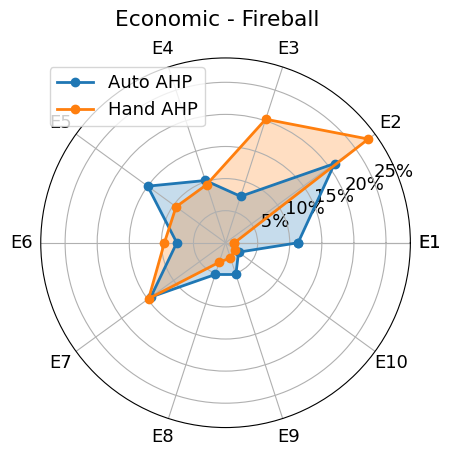

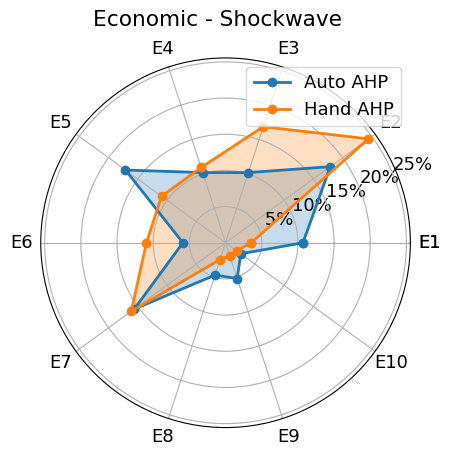

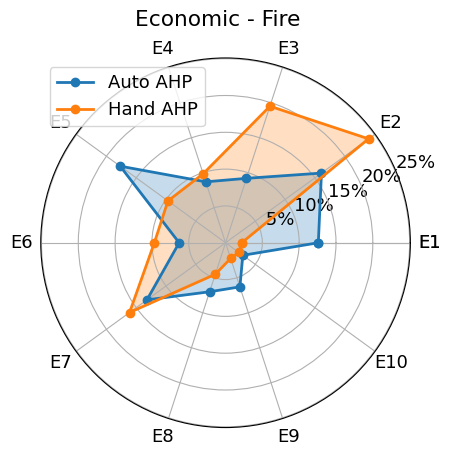

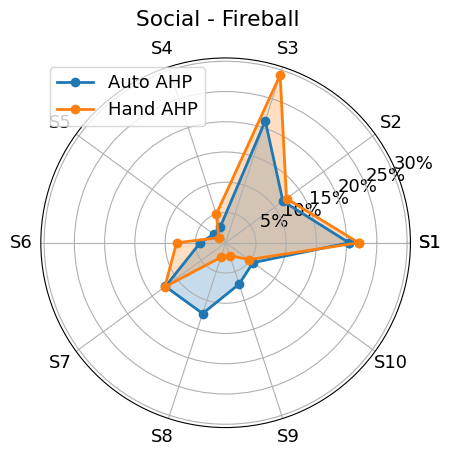

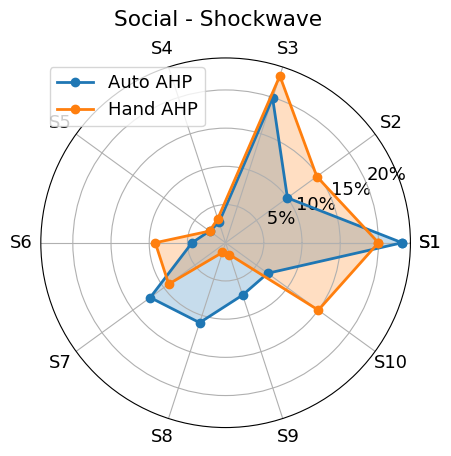

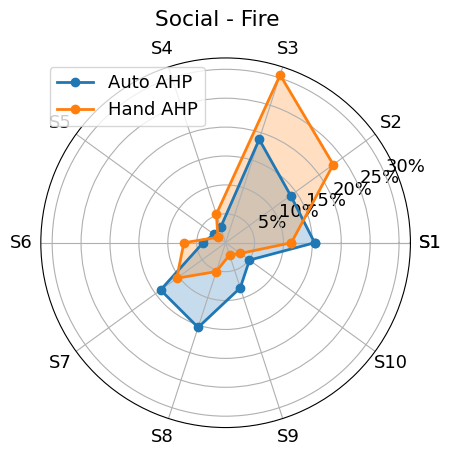

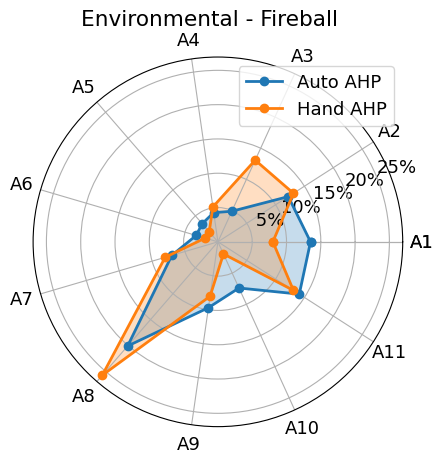

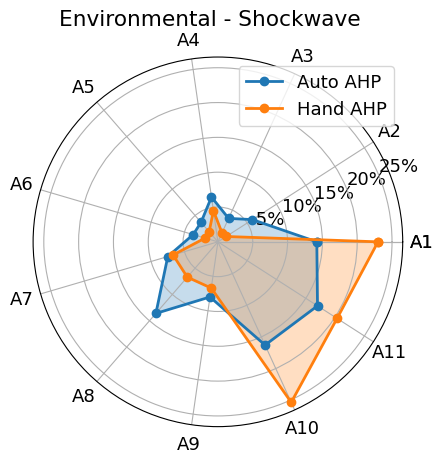

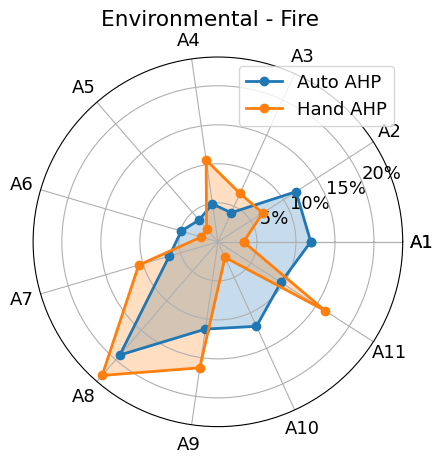

Economic: {'fireball': np.float64(0.7), 'shockwave': np.float64(0.77), 'fire': np.float64(0.54)}
Social: {'fireball': np.float64(0.86), 'shockwave': np.float64(0.74), 'fire': np.float64(0.71)}
Environmental: {'fireball': np.float64(0.81), 'shockwave': np.float64(0.9), 'fire': np.float64(0.55)}


In [ ]:
percent_correlation()

The graphs show the results of obtaining the vector of priorities translated into percentages for convenience for manual from expert and machine from algorithm analyses, for each group of factors (economic, social, environmental) and for each scenario (blast explosion with shockwave, fire, "fireball") in the group, respectively and their correlation analysis